In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

In [43]:
data = {'x': [1,3,3,4,5],
        'y': [2,4,6,7,10]}


df = pd.DataFrame(data)

X = df['x'].values
y = df['y'].values

In [44]:
def add_bias(X):
    return np.c_[np.ones((X.shape[0], 1)), X]


In [221]:
def gradient_descent(X, y, epochs = 500, learning_rate = 0.001):
    X_b = add_bias(X)

    m = X_b.shape[0] # no.of samples
    n = X_b.shape[1] # no. of features
    theta = np.zeros(n) # initialize weights


    theta_history = []
    loss_history = []


    for epoch in range(epochs):
        predictions = X_b.dot(theta)
        errors = predictions-y # calculate error
        gradients = (2/m) * X_b.T.dot(errors)

        theta -= learning_rate * gradients # update weights

        mse = np.mean(errors**2)
        theta_history.append(theta.copy())
        loss_history.append(mse)

        if epoch % 100 ==0 :
            pass
            #print(f'Epoch {epoch}, MSE: {mse:.4f}')
    return theta, np.array(theta_history), np.array(loss_history), mse

In [222]:
theta, theta_history, loss_history, mse = gradient_descent(X,y)
print("Learned params: ", theta)

Learned params:  [0.34358796 1.73925111]


In [223]:
mse

np.float64(0.729916529412403)

Text(0, 0.5, 'y')

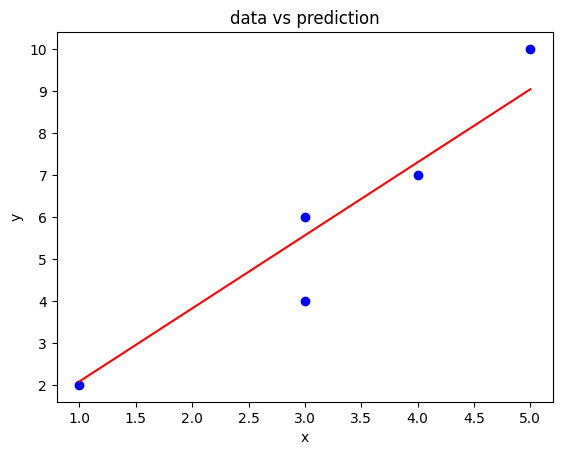

In [224]:
plt.scatter(X, y, color = "blue")

x_line = np.linspace(X.min(), X.max(), 100,).reshape(-1,1)
x_line_b = np.c_[np.ones((x_line.shape[0], 1)), x_line]
y_line = x_line_b.dot(theta)
plt.plot(x_line, y_line, color = "red")
plt.title("data vs prediction")
plt.xlabel("x")
plt.ylabel("y")

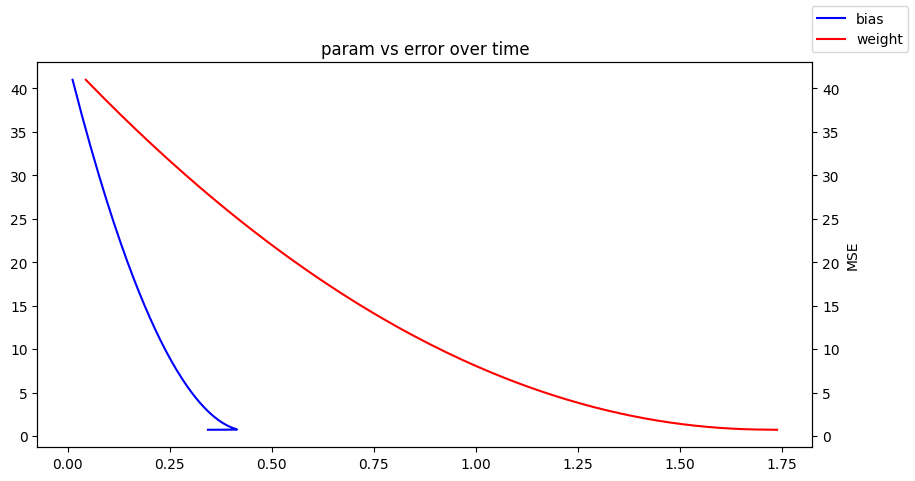

In [235]:
fig, ax= plt.subplots(figsize=(10,5))

ax.plot(theta_history[:, 0], loss_history, color = "blue", label="bias")
ax2 = ax.twinx()
ax2.plot(theta_history[:, 1], loss_history, color = "red", label = "weight")
plt.title("param vs error over time")
plt.xlabel("param value")
plt.ylabel("MSE")
fig.legend()

In [ ]:
def  plot_learning_rate_vs_mse(start, end, num, epochs):
    learning_rates = np.linspace(start,end, num).astype(float)
    final_mse = []
    for l in learning_rates:
        _,_,_,mse = gradient_descent(X, y, epochs = epochs, learning_rate=l)
        final_mse.append(float(mse))
    plt.plot(learning_rates, final_mse, marker='o')
    plt.xlabel('Learning Rate')
    plt.ylabel('Final MSE')
    plt.title(f'Learning Rate vs Final MSE within {epochs} epochs')
    #plt.yscale('log')


interact(plot_learning_rate_vs_mse, start=widgets.FloatSlider(min=0, max=0.1, step=0.001, value=0.001), end= widgets.FloatSlider(min=0, max=0.2, step=0.001, value=0.01), num=widgets.IntSlider(min=10, max=100, step=1, value=20), epochs=widgets.IntSlider(min=100, max=5000, step=100, value=1000))

interactive(children=(FloatSlider(value=0.001, description='start', max=0.1, step=0.001), FloatSlider(value=0.…

<function __main__.plot_learning_rate_vs_mse(start, end, num, epochs)>

In [ ]:
def plot_epochs_vs_mse(start, end, step, lr):
    epochs = range(start, end, step)
    final_mse = []
    for e in epochs:
        _,_,_,mse = gradient_descent(X, y, epochs=e, learning_rate=lr)
        final_mse.append(float(mse))
    plt.plot(epochs, final_mse, marker='o')
    plt.xlabel('Epochs')   
    plt.ylabel('Final MSE')
    plt.title(f'Epochs vs Final MSE, learning rate = {lr:.3f}')

interact(plot_epochs_vs_mse, start=widgets.IntSlider(min=100, max=5000, step=100, value=1000), end=widgets.IntSlider(min=100, max=5000, step=100, value=5000), step=widgets.IntSlider(min=50, max=500, step=50, value=50), lr=widgets.FloatSlider(min=0.001, max=0.2, step=0.001, value=0.01))

interactive(children=(IntSlider(value=1000, description='start', max=5000, min=100, step=100), IntSlider(value…

<function __main__.plot_epochs_vs_mse(start, end, step, lr)>